# 한국 데이터산업 진흥원 제공 문제 

1.  제공된 데이터 (data/mtcats.csv)의 qsec 컬럼을 최소-최대 척도로 변환후 0.5보다 큰 값을 가지는 레코드 수를 '제출형식'에 맞춰 답안 작성 페이지에 입력하시오 

[제출형식]

1. 정수로 입력
2. 정수 답안만 입력 

In [ ]:
import pandas as pd

df = pd.read_csv("data/mtcars.csv")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['qsec'] = scaler.fit_transform(df[['qsec']])
result = df['qsec'] >0.5

print(result)


FileNotFoundError: [Errno 2] No such file or directory: 'data/mtcars.csv'

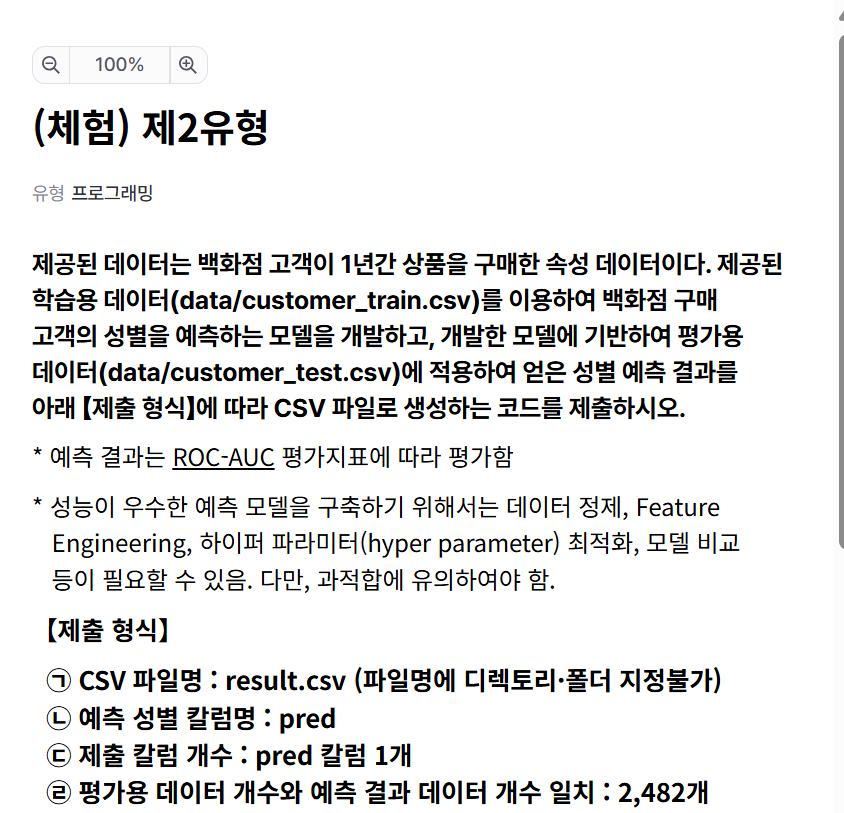
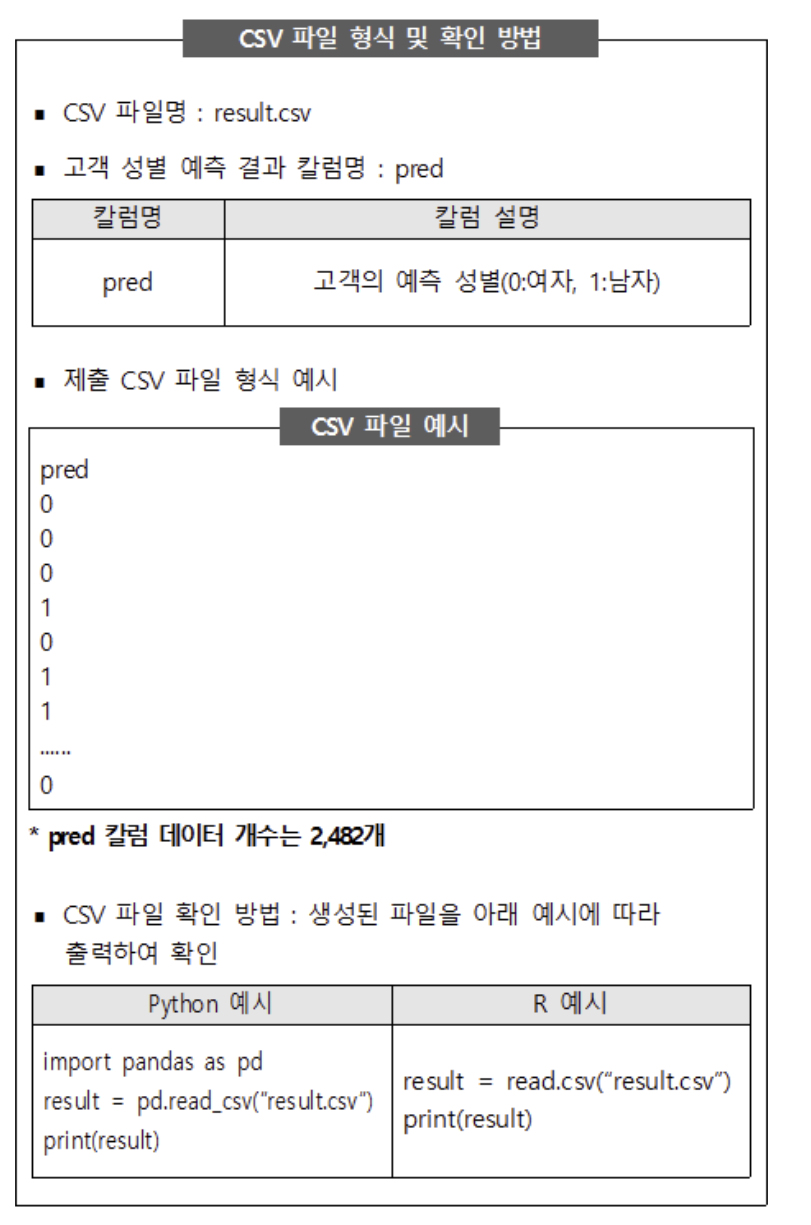

In [ ]:
import pandas as pd

# 데이터 로드 및 확인 , 분류 문제이기에 RandomFroestClassifier을 사용용
train = pd.read_csv('data/customer_train.csv') 
test = pd.read_csv('data/customer_test.csv')

# 결측치 확인 (결측치 존재 행 최빈값으로 대체)
print(train.info())
print(test.info()) 

#결측치 대체 
train = train.fillna(train['환불금액'].mode()[0])
test = test.fillna(train['환불금액'].mode()[0])

print(train.info())
print(test.info()) 
# 데이터 전처리(라벨 인코딩) , 주구매상품, 주구매지점을 정수로 인코딩
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(train['주구매상품'])
train['주구매상품']= le.transform(train['주구매상품'])
test['주구매상품']= le.transform(test['주구매상품'])

le.fit(train['주구매지점'])
train['주구매지점']= le.transform(train['주구매지점'])
test['주구매지점']= le.transform(test['주구매지점'])

# 데이터분할 , 고객의 성별을 예측하는 분류모델델
from sklearn.model_selection import train_test_split

X = train.drop(columns=['회원ID','성별'])
y = train['성별']

X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# 모델링 
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150, max_depth=20)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

# 성능평가
from sklearn.metrics import roc_auc_score , accuracy_score

roc = roc_auc_score(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

#print('roc: ',roc)
#print('acc: ',acc)

# 테스트 데이터 예측
test_X = test.drop(columns=['회원ID'])
pred2 = rfc.predict(test_X)
#print(pred2)

# 결과 데이터 제출 및 확인 
pd.DataFrame({'pred':pred2}).to_csv('result.csv',index=False)
result= pd.read_csv('result.csv')
print(result)


3유형 문제 

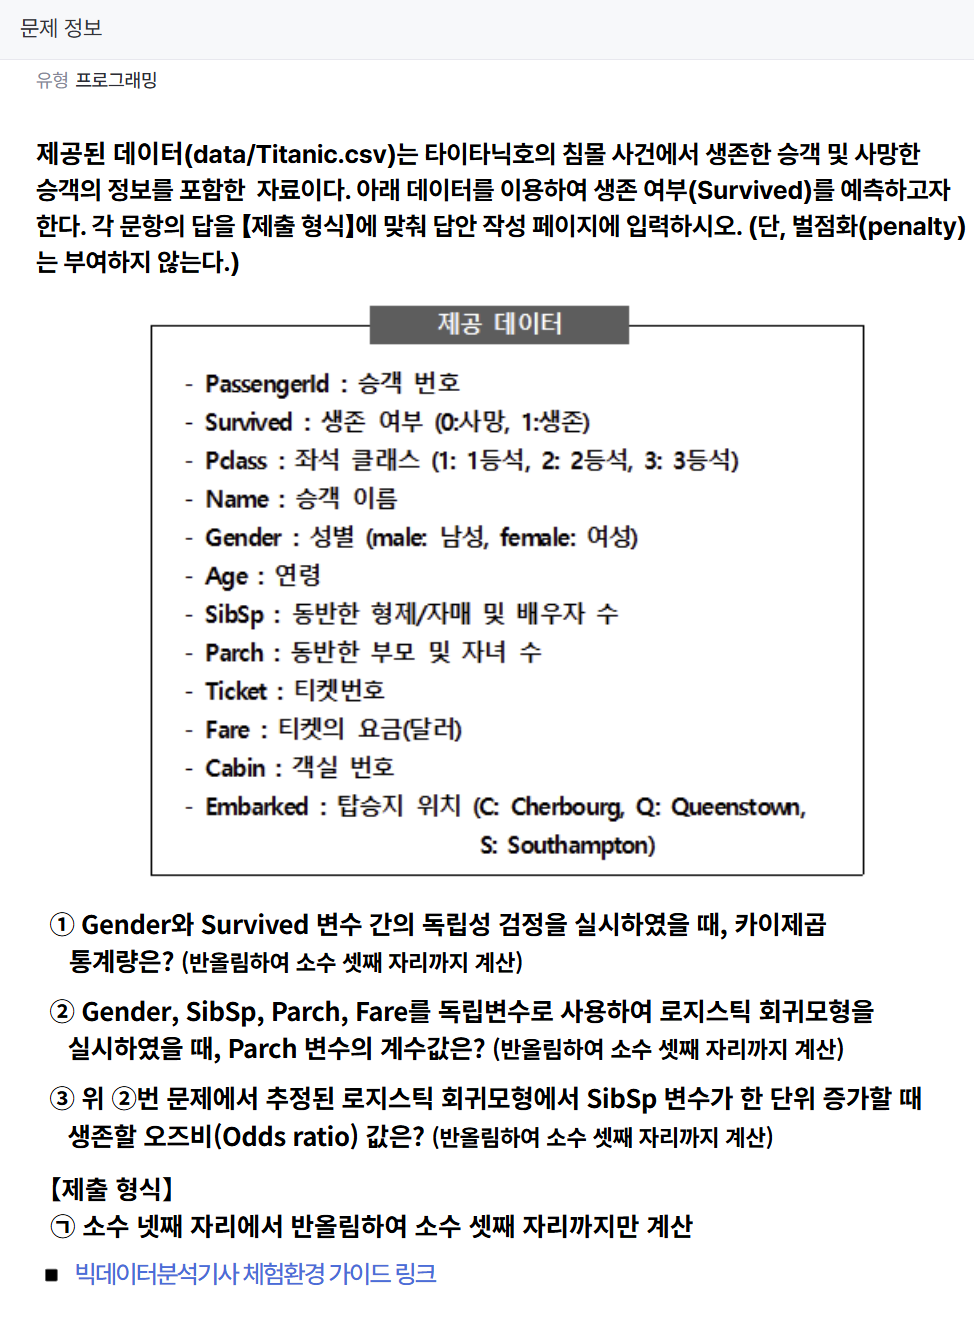


In [1]:
import pandas as pd
# 종속변수는  = 생존 Survived
df = pd.read_csv('data/Titanic.csv')
# print(df.info())

#1번 문제
data = pd.crosstab(df['Gender'],df['Survived'])

from scipy.stats import chi2_contingency
chi2,p_val,dof,exp = chi2_contingency(data)
print(round(chi2,3))# 206.717

# 2번 문제 
from statsmodels.formula.api import logit

result1 = logit('Survived~ Gender + SibSp + Parch + Fare',data=df).fit()
print(round(result1.params['Parch'],3))

# 3번 문제 
import numpy as np
result2 = logit('Survived~ Gender + SibSp + Parch + Fare',data=df).fit().params
print(np.exp(result2))

FileNotFoundError: [Errno 2] No such file or directory: 'data/Titanic.csv'